In [3]:
%matplotlib widget
import ipywidgets as widgets
from IPython.display import display
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Respuesta transitoria y región de diseño
---

## Respuesta transitoria
Podemos generalizar los sistemas de segundo orden como:

$$
G(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n s+\omega_n^2}
$$

Podemos caracterizar la respuesta de sistemas de lazo cerrado utilizando la respuesta al escalón. Donde es posible identificar los siguientes parámetros:

* $y_{ee}$: **valor de estado estacionario**
* $t_{ee}$: **Tiempo de establecimiento**. Tiempo en el cual la respuesta al escalón se confina dentro de una banda de 1%, alrededor del valor final  
* $t_r$: **Tiempo de subida**. Tiemp en el cual la respuesta al escalón llega al 90% de su valor final , por primera vez.
* $M_p$: **Sobrepico**. Valor máximo la salida. Suele expresarse porcentualmente como:

De forma experimental, podemos estimar el sobrepico tomando el valor máximo de la medición y el valor esperado
$$
    SP=\frac{y_{max}-y_{ee}}{y_{ee}} \times 100\%
$$


Una forma facil de estimar si la respuesta transitorio tendrá sobrepico, es analizando el valor de $\zeta$, 
* Si $0<\zeta<1$, el sistema es subamortiguado, por lo que tendra sobrepico. 
* Si $1\leq \zeta$, el sistema es amortiguado, por lo que no habrá sobrepico. 
* Si $\zeta \leq 0$, el sistema será inestable.



FloatSlider(value=0.5, continuous_update=False, description='zeta:', max=2.0, min=-0.1, step=1e-05)

FloatSlider(value=1.0, continuous_update=False, description='wn:', max=20.0, min=-0.1, step=1e-05)

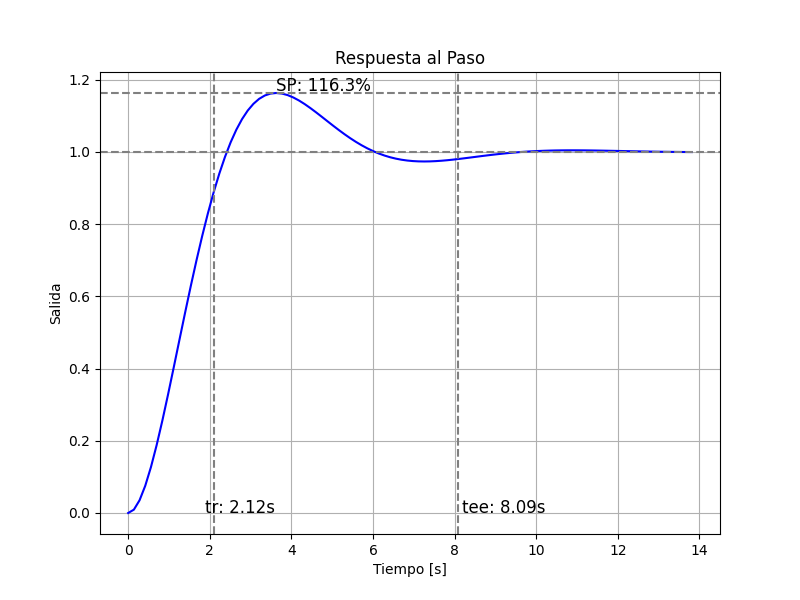

posx and posy should be finite values


In [4]:
# Ejecute esta celda para una visualización interactiva

zeta_slider = widgets.FloatSlider(
    value=0.5, min=-.1, max=2, step=0.00001,
    description='zeta:', continuous_update=False, readout_format='.2f'
)

wn_slider = widgets.FloatSlider(
    value=1, min=-.1, max=20.0, step=0.00001,
    description='wn:', continuous_update=False, readout_format='.2f'
)

fig = plt.figure(figsize=(8, 6))

def update(val=0):
    tf = ct.TransferFunction([wn_slider.value**2], [1, 2*zeta_slider.value*wn_slider.value, wn_slider.value**2])
    info = ct.step_info(tf)
    t, y = ct.step_response(tf)
    plt.clf()
    plt.plot(t, y, label='Respuesta al paso', color='blue')
    plt.axhline(1, color='gray', linestyle='--', label='Referencia')

    # Agregar información clave de la respuesta
    if zeta_slider.value < 1:
        plt.text(info['PeakTime'], info['Peak']+0.005, f"SP: {info['Peak']*100:.1f}%", fontsize=12)
        plt.axhline(info['Peak'], color='gray', linestyle='--', label='Referencia')

    plt.text(info['SettlingTime']+0.1, 0, f"tee: {info['SettlingTime']:.2f}s", fontsize=12)
    plt.axvline(info['SettlingTime'], color='gray', linestyle='--', label='Referencia')
    zeta = zeta_slider.value 
    wn = wn_slider.value
    tr = (2.23*zeta**2 + 0.036*zeta + 1.54)/wn
    plt.text(info['RiseTime']+0.2, 0, f"tr: {tr:.2f}s", fontsize=12)
    plt.axvline(tr, color='gray', linestyle='--', label='Referencia')


    plt.title('Respuesta al Paso')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Salida')
    plt.grid()
    fig.canvas.draw_idle()


display(zeta_slider, wn_slider)

zeta_slider.observe(update, names='value')
wn_slider.observe(update, names='value')

update()

# Cálculo aproximado de los valores
---


Para estimar de forma analítica el valor del sobrepico podemos utilizar la siguiente ecuación:

$$
    SP=e^{-(\pi \zeta)/\sqrt{1-\zeta^2}} \times 100\%
$$ 

Tomando los polos del sistema:

$$
    -\zeta \omega_n \pm \omega_n \sqrt{\zeta^2-1}
$$




Para el tiempo de establecimiento, podemos usar la expresión:

$$
    t_{ee} \approx \frac{4.5}{\zeta\, \omega_n}
$$

El tiempo de subida lo podemos asociar con $\omega_n$, de modo que, el alejamiento de forma radial respecto al origen, causará que el tiempo de elevación menor.

$$
 t_r \approx \frac{2.4}{\omega_n}
$$


## Preguntas orientadoras

+ ¿Cuál es el efecto principal de $\zeta$?
+ ¿Cuál es el efecto principal de $\omega_n$ en el sistema de segundo orden?
+ ¿Cuál es el valor de $\zeta$ necesario para un sobrepico de $0\%$ $5\%$, $10\%$ y $20\%$?
+ ¿Qué pasa cuando $\zeta$ o $\omega_n$ son negativas?

